# Title


## Import Libraries and Data
See prepare-data.ipynb for detail on data prep

In [25]:
#import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')
from datetime import datetime
import statsmodels.formula.api as smf

from sklearn.decomposition import PCA

In [13]:
# read in clean data
airbnb_data_dummies = pd.read_csv('./data/clean/cleaned-listings-dummies.csv')
airbnb_data_dummies_bio = pd.read_csv('./data/clean/cleaned-listings-dummies-bio.csv')
airbnb_data_basic = pd.read_csv('./data/clean/cleaned-listings-base.csv')

agg_pop_words = pd.read_csv('./output.csv')
agg_pop_words.rename(index=str, columns={"Unnamed: 0": "id", "0": "top_word_counts"} , inplace=True)


In [14]:
# drop nas
airbnb_data_dummies_bio = airbnb_data_dummies_bio.dropna()

In [15]:
# get counts for all words and phrases

# scores = pd.read_csv('./all_counts.csv')
# scores.rename(index=str, columns={"Unnamed: 0": "phrase", "0": "counts"} , inplace=True)
# scores.sort_values(by=['counts'], ascending=False, inplace=True)

# scores

In [16]:
# get counts for all phrase scores

# phrases_scores = pd.read_csv('./just-phrases.csv')
# phrases_scores.sort_values(by=['counts'], ascending=False, inplace=True)
# phrases_scores = phrases_scores[['phrase', 'counts']]

# phrases_scores

In [17]:
# list(airbnb_data_dummies_bio.columns.values)
# airbnb_data_dummies_bio.bio_score


In [18]:
# join top scores with full bio set

airbnb_data_dummies_bio = airbnb_data_dummies_bio.set_index('id')
agg_pop_words = agg_pop_words.set_index('id')

airbnb_data_dummies_bio = airbnb_data_dummies_bio.join(other=agg_pop_words, how='inner')

In [31]:
pca_red = PCA(n_components=10).fit_transform(airbnb_data_dummies_bio)

pca_red.explained_variance_ratio_

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

In [24]:
# large formula
formula = 'price ~  top_word_counts + host_response_rate + accommodates + guests_included + bathrooms + bedrooms + beds + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + description_score + bio_score + host_is_superhost + neighbourhood_Ballard  + neighbourhood_Cascade  + neighbourhood_Delridge + neighbourhood_Downtown + neighbourhood_Interbay + neighbourhood_Magnolia + neighbourhood_Northgate + property_type_Apartment  + property_type_Condominium + property_type_House + property_type_Loft + property_type_Townhouse + neighbourhood_Beacon_Hill + neighbourhood_Capitol_Hill + neighbourhood_Central_Area + neighbourhood_Lake_City + neighbourhood_Other_neighborhoods + neighbourhood_Queen_Anne + neighbourhood_Rainier_Valley + neighbourhood_Seward_Park + neighbourhood_University_District + neighbourhood_West_Seattle + property_type_Bed_Breakfast + room_type_Entire_home_apt + room_type_Private_room + room_type_Shared_room'

formula1 = 'price ~  top_word_counts + host_response_rate + accommodates + guests_included + bathrooms + bedrooms + number_of_reviews + review_scores_rating + review_scores_cleanliness + review_scores_location + review_scores_value + description_score + bio_score + host_is_superhost + neighbourhood_Ballard  + neighbourhood_Cascade  + neighbourhood_Delridge + neighbourhood_Downtown + neighbourhood_Magnolia + neighbourhood_Northgate + property_type_Apartment  + property_type_Condominium + property_type_House + property_type_Loft + property_type_Townhouse + neighbourhood_Beacon_Hill + neighbourhood_Capitol_Hill + neighbourhood_Central_Area + neighbourhood_Lake_City + neighbourhood_Other_neighborhoods + neighbourhood_Queen_Anne + neighbourhood_Rainier_Valley + neighbourhood_Seward_Park + neighbourhood_University_District + room_type_Entire_home_apt + room_type_Private_room + room_type_Shared_room'

# formula_slim = 'price ~  top_word_counts + host_response_rate + description_score + bio_score + host_is_superhost'

# fit ordinary least squares model
mod1 = smf.ols(formula=formula1, data=airbnb_data_dummies_bio).fit()
mod1.summary()

# # fit ordinary least squares model
# mod2 = smf.ols(formula=formula_slim, data=airbnb_data_dummies_bio).fit()
# mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:42:40   Log-Likelihood:                -15677.
No. Observations:                2866   AIC:                         3.143e+04
Df Residuals:                    2829   BIC:                         3.165e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -32.0715     21.210     -1.512      0.131     -73.660       9.517
top_word_counts                       9.0592      2.639      3.432      0.001       3.884      14.234
host_response_rate                   -0.2367      0.109     -2.170      0.030      -0.451      -0.023
accommodates                          7.3434      1.063      6.908      0.000       5.259       9.428
guests_included                       5.7359      1.005      5.710      0.000       3.766       7.706
bathrooms                            27.3416      2.446     11.180      0.000      22.546      32.137
bedrooms                             32.0597      2.287     14.020      0.000      27.576      36.544
number_of_reviews                    -0.1448      0.029     -5.045      0.000      -0.201      -0.089
review_scores_rating                  0.9667      0.307      3.153      0.002       0.366       1.568
review_scores_cleanliness             3.2506      2.062      1.577      0.115      -0.792       7.293
review_scores_location                3.6689      2.214      1.657      0.098      -0.673       8.011
review_scores_value                  -8.5830      2.275     -3.772      0.000     -13.044      -4.122
description_score                     8.4518      6.329      1.335      0.182      -3.959      20.863
bio_score                           -13.8667      6.200     -2.237      0.025     -26.024      -1.710
host_is_superhost                     7.1700      2.729      2.627      0.009       1.819      12.521
neighbourhood_Ballard                -8.3620      6.315     -1.324      0.186     -20.744       4.020
neighbourhood_Cascade                19.5161      9.118      2.140      0.032       1.638      37.394
neighbourhood_Delridge              -22.7935      8.712     -2.616      0.009     -39.876      -5.711
neighbourhood_Downtown               29.9958      5.794      5.177      0.000      18.634      41.357
neighbourhood_Magnolia               17.5520     10.141      1.731      0.084      -2.332      37.436
neighbourhood_Northgate             -24.9685      9.027     -2.766      0.006     -42.669      -7.269
property_type_Apartment             -18.3831     10.349     -1.776      0.076     -38.675       1.909
property_type_Condominium           -19.1239     12.562     -1.522      0.128     -43.756       5.508
property_type_House                 -12.3356     10.104     -1.221      0.222     -32.148       7.477
property_type_Loft                    6.5819     14.307      0.460      0.646     -21.472      34.635
property_type_Townhouse             -16.9801     11.670     -1.455      0.146     -39.863       5.902
neighbourhood_Beacon_Hill           -17.2251      8.199     -2.101      0.036     -33.301      -1.149
neighbourhood_Capitol_H

Text(0.5, 1.0, 'Sentiment Score vs. Price')

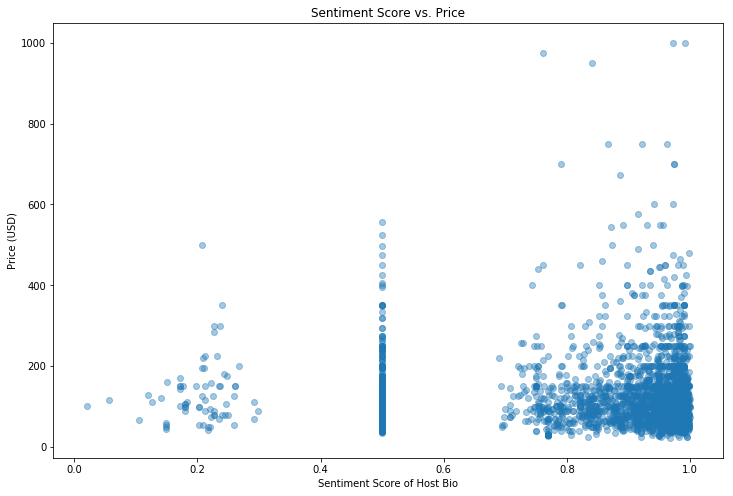

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(airbnb_data_dummies_bio['bio_score'], airbnb_data_dummies_bio['price'], alpha = .4)
plt.xlabel('Sentiment Score of Host Bio')
plt.ylabel('Price (USD)')
plt.title('Sentiment Score vs. Price')

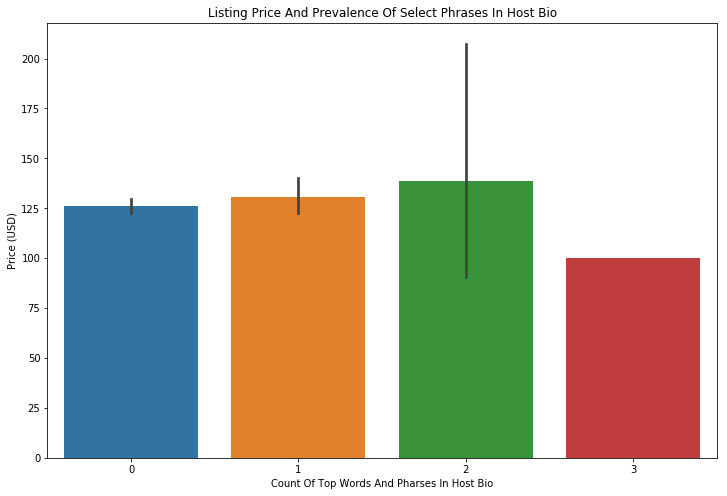

In [22]:
plt.figure(figsize=(12,8))

top_words_barplot = sns.barplot(x="top_word_counts", y="price", data=airbnb_data_dummies_bio)

top_words_barplot.set(xlabel='Count Of Top Words And Pharses In Host Bio', ylabel='Price (USD)',
                      title='Listing Price And Prevalence Of Select Phrases In Host Bio')

top_words_barplot